## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. 
* Convert columns excluding 'Channel' and 'Region' to floats if necessary 
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
import statistics as sta
import scipy.stats as ss
import seaborn as sns

a. Import the data as the name 'data' and check the data head, shape, types, columms. 

In [2]:
data = pd.read_csv("customers.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

In [5]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [6]:
data.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

b. Convert columns excluding 'Channel' and 'Region' to floats if necessary 

In [7]:
new_label = [label.lower() for label in data.columns]
data.columns = new_label

In [8]:
data.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
cols = data.columns.drop(['channel','region'])
data[cols] = data[cols].apply(lambda x: x.astype(np.float))
data[cols].head()

,fresh,milk,grocery,frozen,detergents_paper,delicatessen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


c. Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used

In [10]:
data_copy = data.drop(['channel','region','frozen','detergents_paper','delicatessen'], axis=1)
data_copy.head()

,fresh,milk,grocery
0,12669.0,9656.0,7561.0
1,7057.0,9810.0,9568.0
2,6353.0,8808.0,7684.0
3,13265.0,1196.0,4221.0
4,22615.0,5410.0,7198.0


### Question 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

a. Calculate the min, Q1 (i.e., 25%), median, , Q3(i.e.,75%), max of the annual spending on grocery products

In [11]:
# Calculate the min of the annual spending on grocery products
data_copy.grocery.min()

3.0

In [12]:
# Calculate Q1 of the annual spending on grocery products
# Approach 1: 
np.percentile(data_copy['grocery'], 25)

# Approach 2: data['grocery'].quantile(0.25)

2153.0

In [13]:
# Calculate the median of the annual spending on grocery products
data_copy.grocery.median()

4755.5

In [14]:
# Calculate Q3 of the annual spending on grocery products
np.percentile(data_copy['grocery'], 75)

10655.75

In [15]:
# Calculate the max of the annual spending on grocery products
data_copy.grocery.max()

92780.0

b. Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.

In [16]:
# Calculate the mean of the annual spending on grocery products
data_copy.grocery.mean()

7951.277272727273

In [17]:
# Calculate the range of the annual spending on grocery products
max(data_copy['grocery']) - min(data_copy['grocery'])

92777.0

In [18]:
# Calculate the standard deviation(std) of the annual spending on grocery products
# Approach 1: 
data_copy.grocery.std()

# Approach 2: sta.stdev(data_copy['grocery'])

9503.162828994346

In [19]:
# Calculate skewness of the annual spending on grocery products
ss.skew(data_copy['grocery'])

3.5751872200807875

In [20]:
# Calculate kurtosis index of the annual spending on grocery products
ss.kurtosis(data_copy['grocery'])

20.664153228293365

c. Make a boxplot of the annual spending on grocery products.

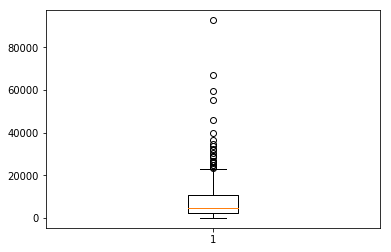

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(data_copy['grocery'])
plt.show()

d. Make a histogram of the annual spending on grocery products.

Text(0.5,1,'Distributions of the annual spending on grocery products')

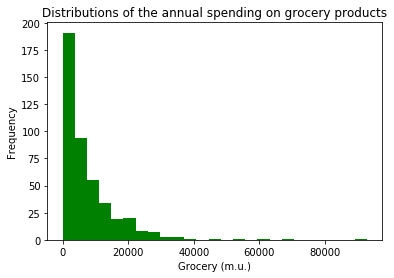

In [22]:
plt.hist(data_copy['grocery'],bins=25, facecolor='green')
plt.xlabel('Grocery (m.u.)')
plt.ylabel('Frequency')
plt.title('Distributions of the annual spending on grocery products')

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. 
* Make a scatter plot of features together. 
* Make a heatmap of features together. 

a. Calculate the correlation of 'Grocery' and 'Milk'

In [23]:
c, p = ss.pearsonr(data_copy['grocery'],data_copy['milk'])

In [24]:
# Correlation
c

0.7283351181536448

In [25]:
# p-value for non-correlation
p

6.480570788053402e-74

b.Make a scatter plot of 'Grocery' and 'Milk'. 

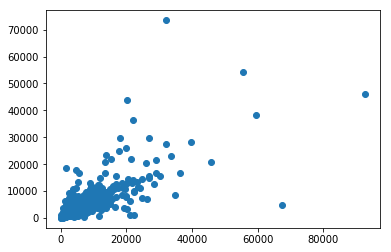

In [26]:
plt.scatter(data_copy['grocery'],data_copy['milk'])
plt.show()

c. Make a scatter plot of features together. 

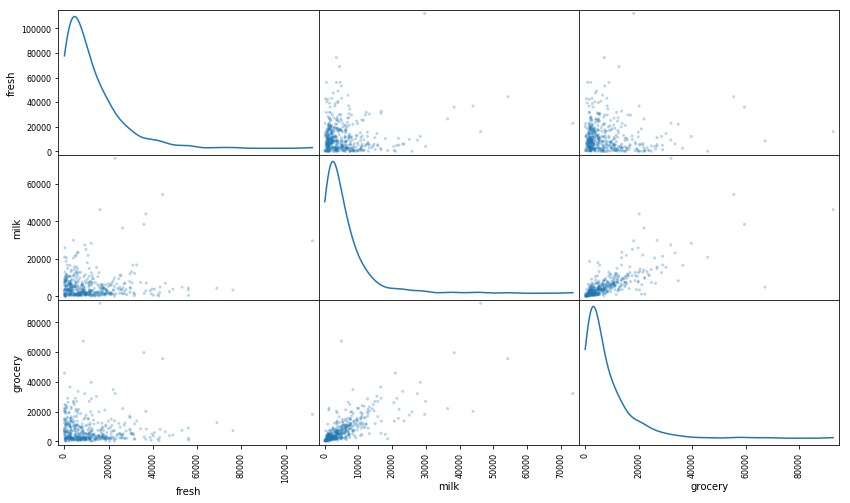

In [27]:
pd.plotting.scatter_matrix(data_copy, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

d. Make a heatmap of features together. 

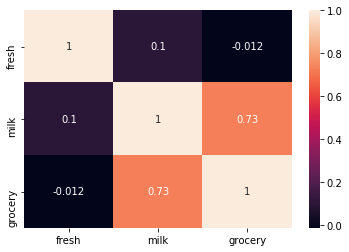

In [28]:
sns.heatmap(data_copy.corr(), annot=True)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Fresh' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

a. Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').

In [29]:
# p-value of non-correlation of pairs: ('Grocery', 'Milk')
c_gm, p_gm = ss.pearsonr(data_copy['grocery'],data_copy['milk'])
p_gm

6.480570788053402e-74

In [30]:
# p-value of non-correlation of pairs: ('Grocery', 'Fresh')
c_gf, p_gf = ss.pearsonr(data_copy['grocery'],data_copy['fresh'])
p_gf

0.8041728013490431

In [31]:
# p-value of non-correlation of pairs: ('Fresh', 'Milk')
c_fm, p_fm = ss.pearsonr(data_copy['fresh'],data_copy['milk'])
p_fm

0.03506100703784227

In [32]:
# The significance level 0.1 (p-given or α =0.1)
p_gv = 0.1

In [33]:
# Reject or accept hypothesis
def check_hypothesis(p_value, p_given, t_hypo):
    if t_hypo == "hypothesis":
        if p_value < p_given:
            print("Accept H")
        else:
            print("Reject H")
    elif t_hypo == "null_hypothesis":
        if p_value < p_given:
            print("Reject H0")
        else:
            print("Accept H0")
    else:
        print("Invalid input! hypothesis or null_hypothesis only!")
    return

b. With the significance level 0.1 (p-given or  α =0.1), do we reject or accept the hypothesis:"'Grocery' and 'Fresh' are corellated."

In [34]:
# Problem: H: 'Grocery' and 'Fresh' are corellated.
#H_0: 'Grocery' and 'Fresh' are non-corellated. 

check_hypothesis(p_gf,p_gv,"hypothesis")

Reject H


c. With the significance level 0.1 (p-given or  α =0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."

In [35]:
# Problem: H: 'Grocery' and 'Milk' are corellated.
#H_0: 'Grocery' and 'Milk' are non-corellated. 

check_hypothesis(p_gm,p_gv,"hypothesis")

Accept H


d. With the significance level 0.1 (p-given or  α =0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [36]:
# Problem: H: 'Grocery' and 'Milk' are corellated.
#H_0: 'Grocery' and 'Milk' are non-corellated. 

check_hypothesis(p_gm,p_gv,"null_hypothesis")

Reject H0


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

a. Transform the data by using np.log and set the new data as the name 'log_data', then visualize this data by using pd.scatter_matrix.

In [37]:
log_data = np.log(data_copy)

In [38]:
log_data.head()

,fresh,milk,grocery
0,9.446913,9.175335,8.930759
1,8.861775,9.191158,9.166179
2,8.756682,9.083416,8.946896
3,9.492884,7.086738,8.347827
4,10.026369,8.596004,8.881558


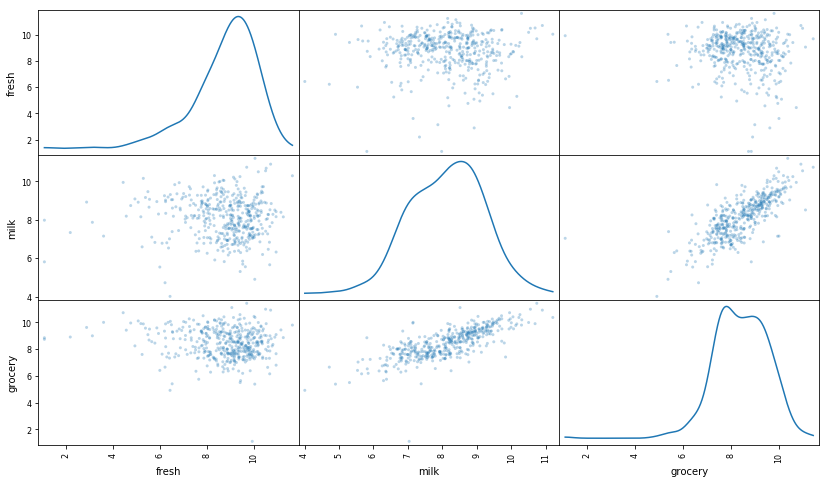

In [39]:
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

b. Remove outliers of each features of 'log_data' whose are out of the fencies " Q1−IQR∗1.5 " and " Q3+IQR∗1.5 ", set the new data by the name 'good_log_data' then visualize this data.

In [40]:
# Find the outliers

outliers=[]

# For each feature find the data points with extreme high or low values
for feature in log_data:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist() 

Outlier step: 2.533507868606793
Data points considered outliers for the feature 'fresh':


,fresh,milk,grocery
65,4.442651,9.950323,10.732651
66,2.197225,7.335634,8.911530
81,5.389072,9.163249,9.575192
95,1.098612,7.979339,8.740657
96,3.135494,7.869402,9.001839
128,4.941642,9.087834,8.248791
171,5.298317,10.160530,9.894245
193,5.192957,8.156223,9.917982
218,2.890372,8.923191,9.629380
304,5.081404,8.917311,10.117510


Outlier step: 2.318248272818475
Data points considered outliers for the feature 'milk':


,fresh,milk,grocery
86,10.039983,11.205013,10.377047
98,6.220590,4.718499,6.656727
154,6.432940,4.007333,4.919981
356,10.029503,4.897840,5.384495


Outlier step: 2.3988562137971394
Data points considered outliers for the feature 'grocery':


,fresh,milk,grocery
75,9.923192,7.036148,1.098612
154,6.432940,4.007333,4.919981


In [41]:
 outliers

[65,
 66,
 81,
 95,
 96,
 128,
 171,
 193,
 218,
 304,
 305,
 338,
 353,
 355,
 357,
 412,
 86,
 98,
 154,
 356,
 75,
 154]

In [42]:
# Remove the outliers, if any were specified
good_log_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_log_data.shape))

Number of outliers (inc duplicates):  22
New dataset with removed outliers has 419 samples with 3 features each.


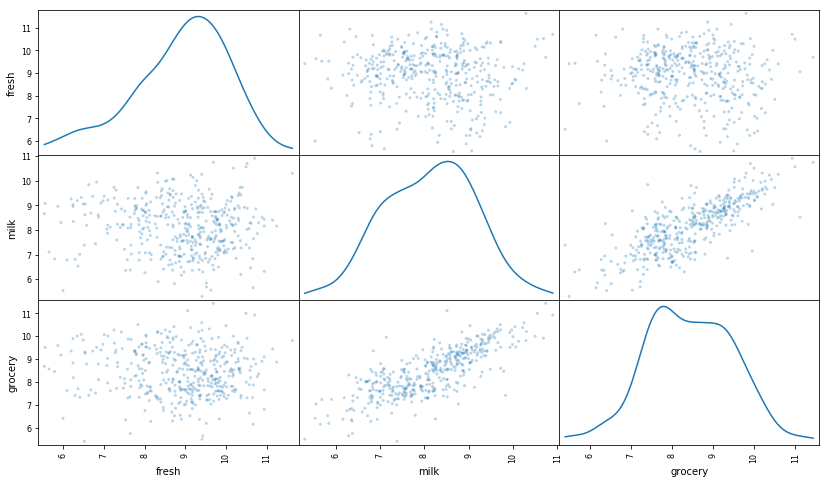

In [43]:
# Visualize the data 'good_log_data'.
pd.plotting.scatter_matrix(good_log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [44]:
p_given = 0.05

a. By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?

- The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
- The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

In [45]:
# log_data set
cvalue, pvalue = ss.ttest_1samp(log_data['fresh'],8.8)
pvalue

0.3254815721715403

In [46]:
# Problem: H: The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
#H_0: The mean of 'Fresh' population (after log-transform) by using the log_data set is 8.8

check_hypothesis(pvalue,p_given,"hypothesis")

Reject H


In [47]:
# good_log_data set
g_cvalue, g_pvalue = ss.ttest_1samp(good_log_data['fresh'],8.8)
g_pvalue

0.04405481686177075

In [48]:
# Problem: H: The mean of 'Fresh' population (after log-transform) by using the good_log_data set is different 8.8
#H_0: The mean of 'Fresh' population (after log-transform) by using the good_log_data set is 8.8

check_hypothesis(g_pvalue,p_given,"hypothesis")

Accept H


b. By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?

- The means of 'Fresh' in the log_data and good_log_data are different
- The means of 'Milk' in the log_data and good_log_data are different

In [49]:
fresh_statistic, fresh_pvalue = ss.ttest_ind(log_data['fresh'],good_log_data['fresh'])
fresh_pvalue

0.0445878102072901

In [50]:
# Problem: H: The means of 'Fresh' in the log_data and good_log_data are different
#H_0: The means of 'Fresh' in the log_data and good_log_data are similar

check_hypothesis(fresh_pvalue,p_given,"hypothesis")

Accept H


In [51]:
milk_statistic, milk_pvalue = ss.ttest_ind(log_data['milk'],good_log_data['milk'])
milk_pvalue

0.8636466291644378

In [52]:
# Problem: H: The means of 'Milk' in the log_data and good_log_data are different
#H_0: The means of 'Milk' in the log_data and good_log_data are similar

check_hypothesis(milk_pvalue,p_given,"hypothesis")

Reject H
